In [75]:
import pandas as pd #
import numpy as np
from joblib import load
from sklearn.decomposition import PCA
from scipy.spatial.distance import mahalanobis
import matplotlib.pyplot as plt
import seaborn as sns

crit_thresh = -0.097692
warn_thresh = -0.045423

# Load Isolation Forest model and scaler
scaler = load('./model/iso_scaler2.joblib')
iso_model = load('./model/iso_model2.joblib')

# Load datasets
#df_val = pd.read_csv("./data/validate.csv")
df_val = pd.read_csv("./../../data/final_moving_avg_devID109_test_prepared.csv")
#df_val = df_val[df_val['devID'] == 103]
#df1 = pd.read_csv("./data/dev101_prepared.csv")
#df2 = pd.read_csv("./data/dev102_prepared.csv")

#df_val = pd.concat([df1, df2], ignore_index=True)
df_val 

,timestamp,devID,temp,humi,soil,rain,geo,rain_ma_1h,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min,label
0,2025-11-16 06:10:00,109,21.70,93.45,35.6,0.00,0.34,0.000000,0.000000,0.000000,0.000000,35.809355,35.956271,36.160034,36.212209,3.533333,5.100000,4.542500,3.414545,NaN
1,2025-11-16 06:11:00,109,21.70,93.30,35.6,0.00,14.56,0.000000,0.000000,0.000000,0.000000,35.808091,35.954523,36.158568,36.211563,5.106667,8.886000,5.898750,4.693636,NaN
2,2025-11-16 06:12:00,109,21.75,93.25,35.6,0.00,7.42,0.000000,0.000000,0.000000,0.000000,35.807120,35.953350,36.157103,36.210918,10.990000,6.516000,6.572500,5.832000,NaN
3,2025-11-16 06:13:00,109,21.80,93.30,35.6,0.00,0.35,0.000000,0.000000,0.000000,0.000000,35.806149,35.952178,36.154797,36.210274,3.885000,4.618000,7.457143,5.496000,NaN
4,2025-11-16 06:13:00,109,21.80,93.20,35.6,0.00,0.27,0.000000,0.000000,0.000000,0.000000,35.805484,35.951589,36.154171,36.209632,2.680000,3.893333,6.558750,5.020909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2025-11-17 18:21:00,109,23.80,97.95,41.9,0.28,0.54,0.240563,3.170836,1.699166,0.850609,43.076996,40.988889,38.497883,37.406198,0.415000,0.382000,0.366667,0.384444,NaN
2531,2025-11-17 18:21:00,109,23.80,98.00,41.9,0.28,3.74,0.241111,3.163307,1.697400,0.850255,43.072538,40.990661,38.502114,37.410351,1.523333,0.941667,0.848571,0.720000,NaN
2532,2025-11-17 18:22:00,109,23.80,98.00,41.9,0.28,3.74,0.241644,3.131462,1.699863,0.849901,43.055871,41.005837,38.517061,37.417375,2.673333,1.740000,1.341429,1.052000,NaN
2533,2025-11-17 18:23:00,109,23.80,98.00,41.9,0.28,0.47,0.230137,3.111775,1.700212,0.850074,43.026806,41.034503,38.526775,37.427290,2.105000,1.756000,1.232500,1.127778,NaN


In [76]:
df = df_val.sort_values('timestamp').reset_index(drop=True)

In [77]:
df_val

,timestamp,devID,temp,humi,soil,rain,geo,rain_ma_1h,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min,label
0,2025-11-16 06:10:00,109,21.70,93.45,35.6,0.00,0.34,0.000000,0.000000,0.000000,0.000000,35.809355,35.956271,36.160034,36.212209,3.533333,5.100000,4.542500,3.414545,NaN
1,2025-11-16 06:11:00,109,21.70,93.30,35.6,0.00,14.56,0.000000,0.000000,0.000000,0.000000,35.808091,35.954523,36.158568,36.211563,5.106667,8.886000,5.898750,4.693636,NaN
2,2025-11-16 06:12:00,109,21.75,93.25,35.6,0.00,7.42,0.000000,0.000000,0.000000,0.000000,35.807120,35.953350,36.157103,36.210918,10.990000,6.516000,6.572500,5.832000,NaN
3,2025-11-16 06:13:00,109,21.80,93.30,35.6,0.00,0.35,0.000000,0.000000,0.000000,0.000000,35.806149,35.952178,36.154797,36.210274,3.885000,4.618000,7.457143,5.496000,NaN
4,2025-11-16 06:13:00,109,21.80,93.20,35.6,0.00,0.27,0.000000,0.000000,0.000000,0.000000,35.805484,35.951589,36.154171,36.209632,2.680000,3.893333,6.558750,5.020909,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2025-11-17 18:21:00,109,23.80,97.95,41.9,0.28,0.54,0.240563,3.170836,1.699166,0.850609,43.076996,40.988889,38.497883,37.406198,0.415000,0.382000,0.366667,0.384444,NaN
2531,2025-11-17 18:21:00,109,23.80,98.00,41.9,0.28,3.74,0.241111,3.163307,1.697400,0.850255,43.072538,40.990661,38.502114,37.410351,1.523333,0.941667,0.848571,0.720000,NaN
2532,2025-11-17 18:22:00,109,23.80,98.00,41.9,0.28,3.74,0.241644,3.131462,1.699863,0.849901,43.055871,41.005837,38.517061,37.417375,2.673333,1.740000,1.341429,1.052000,NaN
2533,2025-11-17 18:23:00,109,23.80,98.00,41.9,0.28,0.47,0.230137,3.111775,1.700212,0.850074,43.026806,41.034503,38.526775,37.427290,2.105000,1.756000,1.232500,1.127778,NaN


In [78]:
#df_val  = pd.concat([df1, df2], ignore_index=True)
df_val.describe()

,devID,temp,humi,soil,rain,geo,rain_ma_1h,rain_ma_6h,rain_ma_12h,rain_ma_24h,soil_ma_4h,soil_ma_8h,soil_ma_12h,soil_ma_16h,geo_ma_2min,geo_ma_4min,geo_ma_6min,geo_ma_8min
count,2535.0,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000,2535.000000
mean,109.0,26.696765,84.839961,36.000907,0.540335,3.318067,0.532612,0.417254,0.199185,0.099624,35.715328,35.347049,35.263572,35.304480,3.268501,3.292424,3.294665,3.291949
std,0.0,3.325174,13.479358,3.172703,2.961407,6.409452,2.004383,1.061051,0.502102,0.251644,2.589751,1.413448,0.912599,0.739012,5.423248,4.616908,4.224603,3.954424
min,109.0,21.700000,52.100000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34.084712,34.131952,34.184304,34.227596,-1.290000,-0.126000,-0.006667,0.285000
25%,109.0,24.000000,71.675000,34.300000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,34.300000,34.347500,34.472194,34.640607,0.405000,0.520000,0.684018,0.930909
50%,109.0,24.800000,91.900000,34.750000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,34.881429,35.071066,35.188064,35.288704,0.710000,1.414000,1.642500,1.787143
75%,109.0,29.500000,95.125000,35.500000,0.000000,2.190000,0.000000,0.010742,0.005217,0.002445,35.538279,35.644298,35.739066,35.862011,3.158333,3.726667,4.108571,4.332727
max,109.0,34.300000,98.100000,46.600000,31.990000,32.000000,13.636786,3.557418,1.700212,0.850776,44.101025,41.049708,38.530970,37.434320,31.420000,27.736667,26.217500,24.972000


## Threshold

In [79]:
#def rule_based_risk(row):
#   score = 0
#   
#   # Rainfall (mm/h)
#   if row['rain'] > 25:
#       score += 2
#   elif row['rain'] > 10:
#       score += 1
#
#   # Soil moisture (%)
#   if row['soil'] > 60:
#       score += 2
#   elif row['soil'] > 45:
#       score += 1
#
#   # Temperature (°C)
#   if row['temp'] < 27:
#       score += 2
#   elif row['temp'] < 32:
#       score += 1
#
#   # Humidity (%)
#   if row['humi'] > 80:
#       score += 2
#   elif row['humi'] > 65:
#       score += 1
#
#   # Geophone (Hz)
#   if row['geo'] > 25:
#       score += 1
#   elif row['geo'] > 10:
#       score += 0.5
#
#   if score >= 6:
#       return "Critical"
#   elif score >= 3:
#       return "Warning"
#   else:
#       return "Normal"
#
#feature_cols = ['soil', 'rain', 'temp', 'humi', 'geo']
#X_val = df_val[feature_cols].values
#X_val_scaled = scaler.transform(X_val)
#
#df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)
#
#crit_thresh = np.percentile(df_val['anomaly_score'], 0.5)
#warn_thresh = np.percentile(df_val['anomaly_score'], 5)
#
#def model_based_risk(score):
#   if score < crit_thresh:
#       return "Critical"
#   elif score < warn_thresh:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['model_risk'] = df_val['anomaly_score'].apply(model_based_risk)
#df_val['rule_risk'] = df_val.apply(rule_based_risk, axis=1)
#
#risk_levels = {'Normal': 0, 'Warning': 1, 'Critical': 2}
#
#def combine_weighted_risks(model_risk, rule_risk, w_model=0.6, w_rule=0.4):
#   score = w_model * risk_levels[model_risk] + w_rule * risk_levels[rule_risk]
#   
#   if score >= 1.5:
#       return "Critical"
#   elif score >= 0.5:
#       return "Warning"
#   else:
#       return "Normal"
#
#df_val['predicted_risk'] = df_val.apply(
#    lambda row: combine_weighted_risks(row['model_risk'], row['rule_risk']),
#    axis=1
#)
#
#print(df_val[['soil', 'rain', 'temp', 'humi', 'geo',
#              'anomaly_score', 'model_risk', 'rule_risk', 'predicted_risk']].head())

In [80]:
# สร้าง features
feature_cols = ['soil', 'rain', 'temp', 'humi', 'geo']
X_val = df_val[feature_cols].values
X_val_scaled = scaler.transform(X_val)

# คำนวณ anomaly score และจัดระดับความเสี่ยง
df_val['anomaly_score'] = iso_model.decision_function(X_val_scaled)


#crit_thresh = np.percentile(df_val['anomaly_score'], 0.25)
#warn_thresh = np.percentile(df_val['anomaly_score'], 0.75)
#crit_thresh = -0.094870
#warn_thresh = -0.042534

def classify_risk(score):
    if score < crit_thresh:
        return "Critical"
    elif score < warn_thresh:
        return "Warning"
    else:
        return "Normal"

df_val['predicted_risk'] = df_val['anomaly_score'].apply(classify_risk)

In [81]:
#print("crit_thresh:", np.percentile(df_val['anomaly_score'], 0.433))
#print("warn_thresh:", np.percentile(df_val['anomaly_score'], 2.226))

In [82]:
critical_group = df_val[df_val['anomaly_score'] < crit_thresh]
print("critical_group")
print(critical_group[feature_cols].describe())

critical_group
            soil       rain       temp       humi        geo
count  76.000000  76.000000  76.000000  76.000000  76.000000
mean   44.204605  14.666447  23.903947  97.282237  18.654605
std     2.903460   9.026654   0.530959   0.456195   8.997464
min    34.300000   1.120000  23.400000  94.700000   0.310000
25%    41.900000   7.820000  23.500000  97.000000  15.697500
50%    45.725000  12.290000  23.700000  97.300000  20.550000
75%    46.250000  21.300000  24.400000  97.662500  25.032500
max    46.600000  31.990000  25.900000  97.900000  31.700000


In [83]:
warn_group = df_val[(df_val['anomaly_score'] < warn_thresh) & (df_val['anomaly_score'] >= crit_thresh) ]
print("warn_group")
print(warn_group[feature_cols].describe())

warn_group
            soil       rain       temp       humi        geo
count  31.000000  31.000000  31.000000  31.000000  31.000000
mean   38.741935   2.100645  24.738710  94.511290  22.105161
std     3.764972   2.388955   1.658097   7.752169   9.206606
min    34.100000   0.000000  23.600000  55.300000   0.000000
25%    34.450000   0.140000  24.000000  95.150000  18.535000
50%    40.600000   1.120000  24.600000  97.000000  22.650000
75%    41.600000   3.490000  24.700000  97.375000  29.745000
max    44.200000   7.820000  33.100000  98.100000  32.000000


In [84]:
normal_group = df_val[df_val['anomaly_score'] >= warn_thresh]
print("normal_group")
print(normal_group[feature_cols].describe())

normal_group
              soil         rain         temp         humi          geo
count  2428.000000  2428.000000  2428.000000  2428.000000  2428.000000
mean     35.709123     0.078245    26.809185    84.327018     2.598143
std       2.790249     0.273294     3.345996    13.514750     5.191397
min      34.000000     0.000000    21.700000    52.100000     0.000000
25%      34.300000     0.000000    24.000000    70.975000     0.360000
50%      34.700000     0.000000    25.175000    91.400000     0.490000
75%      35.500000     0.000000    29.550000    94.800000     2.080000
max      46.200000     1.680000    34.300000    98.100000    31.950000


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\2053204387.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')


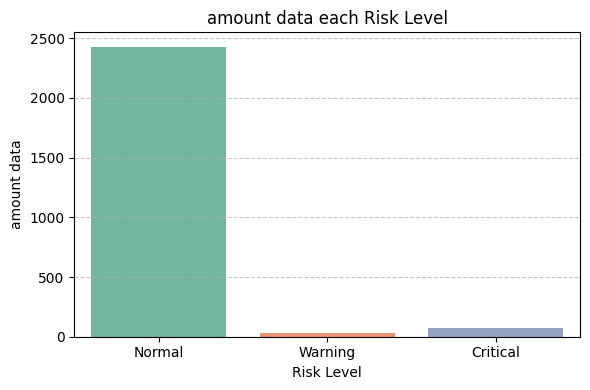

In [85]:

plt.figure(figsize=(6, 4))
sns.countplot(data=df_val, x='predicted_risk', order=['Normal', 'Warning', 'Critical'], palette='Set2')

plt.title('amount data each Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('amount data')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Distribution of Anomaly Scores

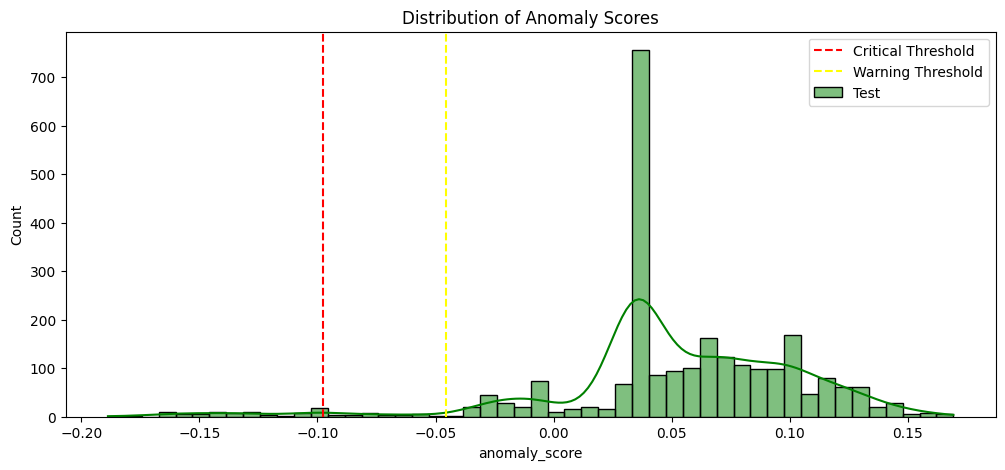

In [86]:
plt.figure(figsize=(12,5))
sns.histplot(df_val['anomaly_score'], bins=50, kde=True, color='green', label='Test')
plt.axvline(crit_thresh, color='red', linestyle='--', label='Critical Threshold')
plt.axvline(warn_thresh, color='yellow', linestyle='--', label='Warning Threshold')
plt.legend()
plt.title('Distribution of Anomaly Scores')
plt.show()



## Z-score Outlier

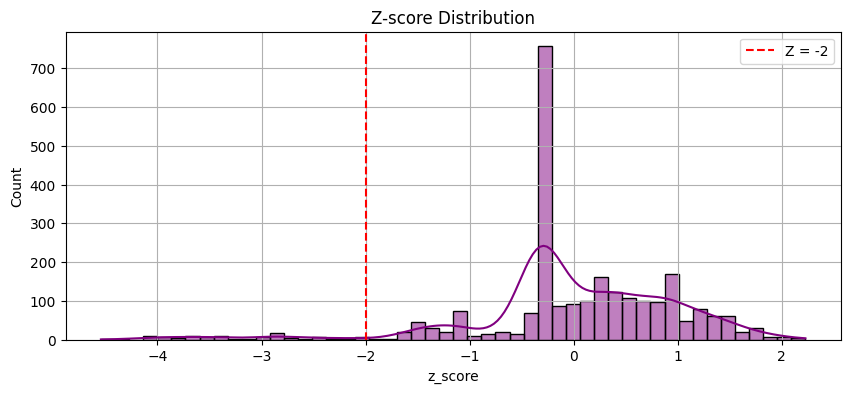

In [87]:
# ==== Z-score Outlier ====

mean_score = df_val['anomaly_score'].mean()
std_score = df_val['anomaly_score'].std()
df_val['z_score'] = (df_val['anomaly_score'] - mean_score) / std_score
df_val['z_outlier'] = df_val['z_score'].apply(lambda z: 'Anomaly' if z < -2 else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['z_score'], kde=True, bins=50, color='purple')
plt.axvline(-2, color='red', linestyle='--', label='Z = -2')
plt.title("Z-score Distribution")
plt.legend()
plt.grid(True)
plt.show()

## Mahalanobis Distance

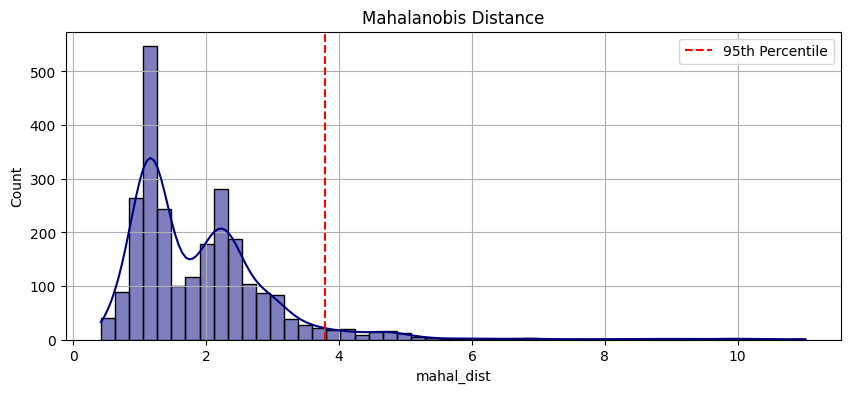

In [88]:
mean_vec = np.mean(X_val_scaled, axis=0)
cov_matrix = np.cov(X_val_scaled, rowvar=False)
inv_covmat = np.linalg.inv(cov_matrix)

df_val['mahal_dist'] = [mahalanobis(x, mean_vec, inv_covmat) for x in X_val_scaled]
mahal_thresh = np.percentile(df_val['mahal_dist'], 95)
df_val['mahal_outlier'] = df_val['mahal_dist'].apply(lambda d: 'Anomaly' if d > mahal_thresh else 'Normal')

plt.figure(figsize=(10,4))
sns.histplot(df_val['mahal_dist'], bins=50, kde=True, color='navy')
plt.axvline(mahal_thresh, color='red', linestyle='--', label='95th Percentile')
plt.title("Mahalanobis Distance")
plt.legend()
plt.grid(True)
plt.show()

## Percentile Threshold 5%

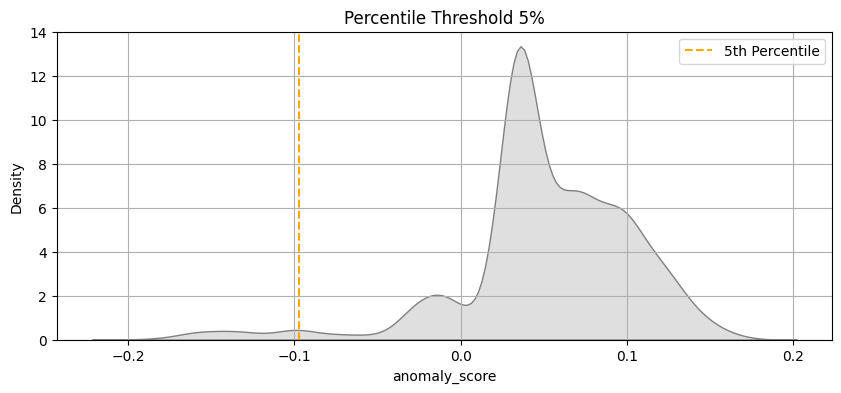

In [89]:
percentile = np.percentile(df_val['anomaly_score'], 3)
df_val['percentile_outlier'] = df_val['anomaly_score'].apply(lambda s: 'Anomaly' if s < percentile else 'Normal')

plt.figure(figsize=(10,4))
sns.kdeplot(df_val['anomaly_score'], fill=True, color='gray')
plt.axvline(percentile, color='orange', linestyle='--', label='5th Percentile')
plt.title("Percentile Threshold 5%")
plt.legend()
plt.grid(True)
plt.show()

## PCA

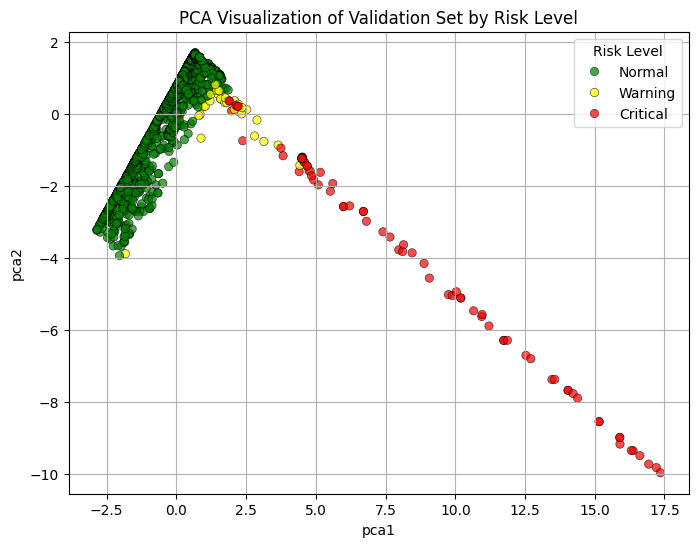

In [90]:
# Fit PCA
pca = PCA(n_components=2)
X_val_pca = pca.fit_transform(X_val_scaled)

# เพิ่มค่า PCA กลับเข้า df_val
df_val['pca1'] = X_val_pca[:, 0]
df_val['pca2'] = X_val_pca[:, 1]

# Map สีแบบกำหนดเอง
custom_palette = {
    'Normal': 'green',
    'Warning': 'yellow',
    'Critical': 'red'
}

# วาดกราฟ
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_val,
    x='pca1', y='pca2',
    hue='predicted_risk',
    palette=custom_palette,
    alpha=0.7,
    edgecolor='black'
)
plt.title('PCA Visualization of Validation Set by Risk Level')
plt.grid(True)
plt.legend(title='Risk Level')
plt.show()

In [91]:
explained_var = pca.explained_variance_ratio_
print(f"PCA explain {explained_var[0]*100:.2f}% and {explained_var[1]*100:.2f}% of data")


PCA explain 51.73% and 37.62% of data


In [92]:
# ดูว่าแต่ละ feature มีน้ำหนักกับแต่ละ principal component เท่าไหร่ x=PC1 y=PC2
pca_df = pd.DataFrame(pca.components_, columns=feature_cols, index=["PC1", "PC2"])
print(pca_df.T.sort_values("PC1", ascending=False))  # เรียงตามผลต่อแกน X


           PC1       PC2
rain  0.796330 -0.545879
humi  0.482868  0.671169
geo   0.162293 -0.211944
soil  0.059945 -0.011084
temp -0.320568 -0.454428


## Summary Statistics

In [93]:
print("\n== Z-score Outlier ==")
print(df_val['z_outlier'].value_counts())


== Z-score Outlier ==
z_outlier
Normal     2429
Anomaly     106
Name: count, dtype: int64


In [94]:
print("\n== Percentile Outlier ==")
print(f"5th Percentile Threshold: {percentile:.4f}")
print(df_val['percentile_outlier'].value_counts())


== Percentile Outlier ==
5th Percentile Threshold: -0.0973
percentile_outlier
Normal     2458
Anomaly      77
Name: count, dtype: int64


In [95]:
print("\n== Mahalanobis Outlier ==")
print(f"95th Percentile of Mahalanobis Distance: {mahal_thresh:.2f}")
print(df_val['mahal_outlier'].value_counts())


== Mahalanobis Outlier ==
95th Percentile of Mahalanobis Distance: 3.78
mahal_outlier
Normal     2408
Anomaly     127
Name: count, dtype: int64


In [96]:
overlap = df_val[
    (df_val['z_outlier'] == 'Anomaly') &
    (df_val['percentile_outlier'] == 'Anomaly') &
    (df_val['mahal_outlier'] == 'Anomaly')
]
print(f"Anomalies detected by ALL 3 methods: {len(overlap)}")


Anomalies detected by ALL 3 methods: 58


In [97]:
df_val['combined_outlier'] = df_val.apply(
    lambda row: (
        row['z_outlier'] == 'Anomaly' or
        row['percentile_outlier'] == 'Anomaly' or
        row['mahal_outlier'] == 'Anomaly'
    ),
    axis=1
)

print("\n== Combined Outlier ==")
print(df_val['combined_outlier'].value_counts())


== Combined Outlier ==
combined_outlier
False    2376
True      159
Name: count, dtype: int64


In [98]:
print("\n== Mean Feature Values by Risk Level ==")
print(df_val.groupby('predicted_risk')[feature_cols].mean())


== Mean Feature Values by Risk Level ==
                     soil       rain       temp       humi        geo
predicted_risk                                                       
Critical        44.204605  14.666447  23.903947  97.282237  18.654605
Normal          35.709123   0.078245  26.809185  84.327018   2.598143
Warning         38.741935   2.100645  24.738710  94.511290  22.105161


In [99]:
print("\n== Risk Level ==")
print(df_val['predicted_risk'].value_counts())


== Risk Level ==
predicted_risk
Normal      2428
Critical      76
Warning       31
Name: count, dtype: int64


In [100]:
def risk_from_combined(row):
    if row['combined_outlier']:
        if row['anomaly_score'] < crit_thresh:
            return 'Critical'
        elif row['anomaly_score'] < warn_thresh:
            return 'Warning'
        else:
            return 'Warning'  
    return 'Normal'

df_val['risk_level_final'] = df_val.apply(risk_from_combined, axis=1)
print("\n== risk level final ==")
print(df_val['risk_level_final'].value_counts())


== risk level final ==
risk_level_final
Normal      2376
Warning       83
Critical      76
Name: count, dtype: int64


In [101]:
print("\n== Risk final Proportion ==")
print("Validation:", df_val['risk_level_final'].value_counts(normalize=True))


== Risk final Proportion ==
Validation: risk_level_final
Normal      0.937278
Warning     0.032742
Critical    0.029980
Name: proportion, dtype: float64


In [102]:
print("\n== Risk Proportion ==")
print("Validation:", df_val['predicted_risk'].value_counts(normalize=True))


== Risk Proportion ==
Validation: predicted_risk
Normal      0.957791
Critical    0.029980
Warning     0.012229
Name: proportion, dtype: float64


##  Signal-to-Noise Ratio (SNR)

In [103]:
def compute_snr(signal):
    mean_signal = np.mean(signal)
    std_signal = np.std(signal)
    return mean_signal / std_signal if std_signal != 0 else 0

for col in feature_cols:
    snr = compute_snr(df_val[col])
    print(f"SNR of {col}: {snr:.2f}")


SNR of soil: 11.35
SNR of rain: 0.18
SNR of temp: 8.03
SNR of humi: 6.30
SNR of geo: 0.52


In [104]:
for col in feature_cols:
    normal_snr = compute_snr(df_val[df_val['predicted_risk'] == 'Normal'][col])
    anomaly_snr = compute_snr(df_val[df_val['predicted_risk'] != 'Normal'][col])
    print(f"{col}: Normal SNR={normal_snr:.2f}, Anomaly SNR={anomaly_snr:.2f}")


soil: Normal SNR=12.80, Anomaly SNR=10.65
rain: Normal SNR=0.29, Anomaly SNR=1.15
temp: Normal SNR=8.01, Anomaly SNR=22.90
humi: Normal SNR=6.24, Anomaly SNR=22.39
geo: Normal SNR=0.50, Anomaly SNR=2.16


## Mean Absolute Error (MAE)

In [105]:
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
interval = df_val['timestamp'].diff().median()
print(f"Sampling interval: {interval}")


Sampling interval: 0 days 00:01:00


In [106]:
window_size = int(pd.Timedelta('1H') / interval)
print(f"Rolling window size for 1 hour: {window_size}")


Rolling window size for 1 hour: 60


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\504831528.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


In [107]:
interval = df_val['timestamp'].diff().median()
window_size = int(pd.Timedelta('1H') / interval)

print(f"Using rolling window size = {window_size} for 1 hour")

for col in feature_cols:
    df_val[f'{col}_roll_mean'] = df_val[col].rolling(window=window_size, center=True).mean()
    df_val[f'{col}_mae'] = (df_val[col] - df_val[f'{col}_roll_mean']).abs()

    mae = df_val[f'{col}_mae'].mean()
    print(f"MAE for {col} (vs rolling mean): {mae:.2f}")


Using rolling window size = 60 for 1 hour
MAE for soil (vs rolling mean): 0.11
MAE for rain (vs rolling mean): 0.50
MAE for temp (vs rolling mean): 0.26
MAE for humi (vs rolling mean): 1.01
MAE for geo (vs rolling mean): 3.57


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\2248412977.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version. Please use 'h' instead of 'H'.
  window_size = int(pd.Timedelta('1H') / interval)


## Cross-Correlation

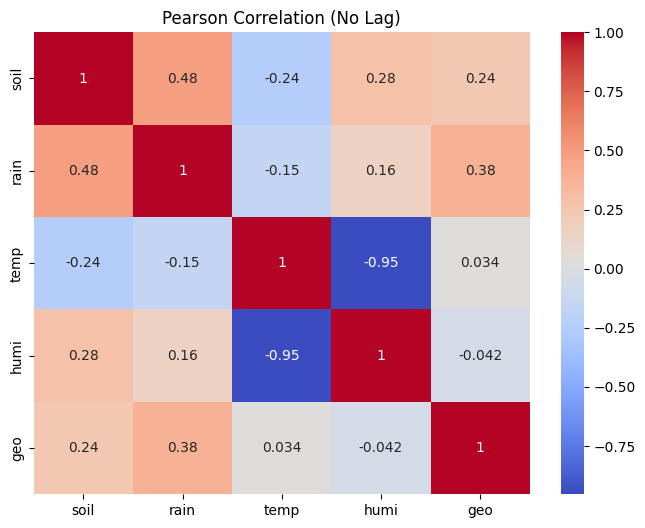

In [108]:
corr_matrix = df_val[feature_cols]
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix.corr(), annot=True, cmap='coolwarm')
plt.title("Pearson Correlation (No Lag)")
plt.show()

In [109]:
def lag_corr(x, y, max_lag=window_size*10):
    lags = []
    corrs = []
    for lag in range(-max_lag, max_lag + 1):
        if lag < 0:
            corr = np.corrcoef(x[:lag], y[-lag:])[0, 1]
        elif lag > 0:
            corr = np.corrcoef(x[lag:], y[:-lag])[0, 1]
        else:
            corr = np.corrcoef(x, y)[0, 1]
        lags.append(lag)
        corrs.append(corr)
    return lags, corrs


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\1202832202.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\1202832202.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


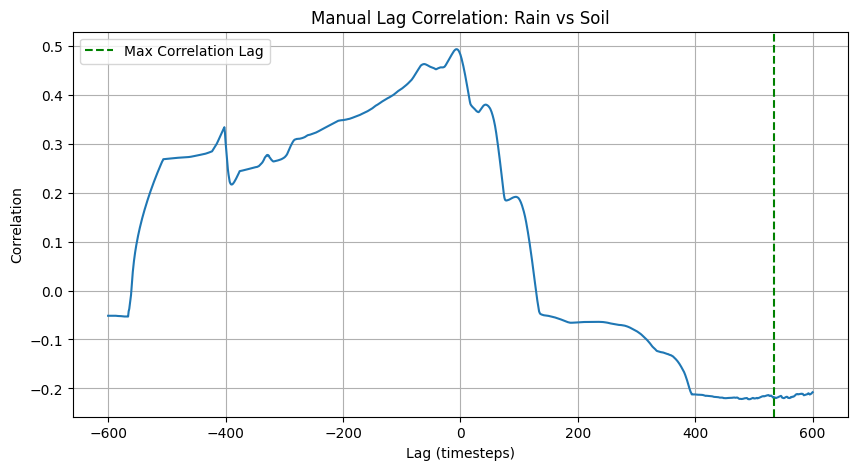

In [110]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values
lags, corrs = lag_corr(x, y, max_lag=window_size*10)

plt.figure(figsize=(10, 5))
plt.plot(lags, corrs)
plt.axvline(x=np.argmax(corrs) - 60, color='green', linestyle='--', label='Max Correlation Lag')
plt.title("Manual Lag Correlation: Rain vs Soil")
plt.xlabel("Lag (timesteps)")
plt.ylabel("Correlation")
plt.grid(True)
plt.legend()
plt.show()


C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\3179048846.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  x = df_val['rain'].fillna(method='ffill').values
C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\3179048846.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  y = df_val['soil'].fillna(method='ffill').values


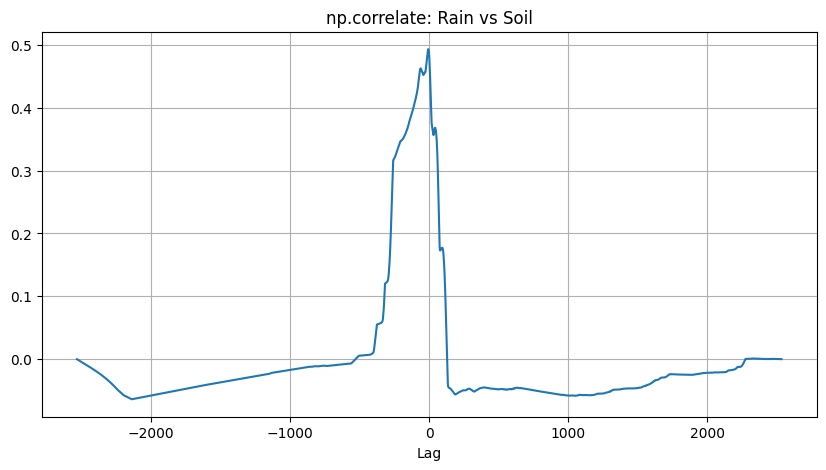

In [111]:
x = df_val['rain'].fillna(method='ffill').values
y = df_val['soil'].fillna(method='ffill').values

x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

corr = np.correlate(x, y, mode='full') / len(x)
lags = np.arange(-len(x)+1, len(x))

plt.figure(figsize=(10,5))
plt.plot(lags, corr)
plt.title("np.correlate: Rain vs Soil")
plt.xlabel("Lag")
plt.grid(True)
plt.show()


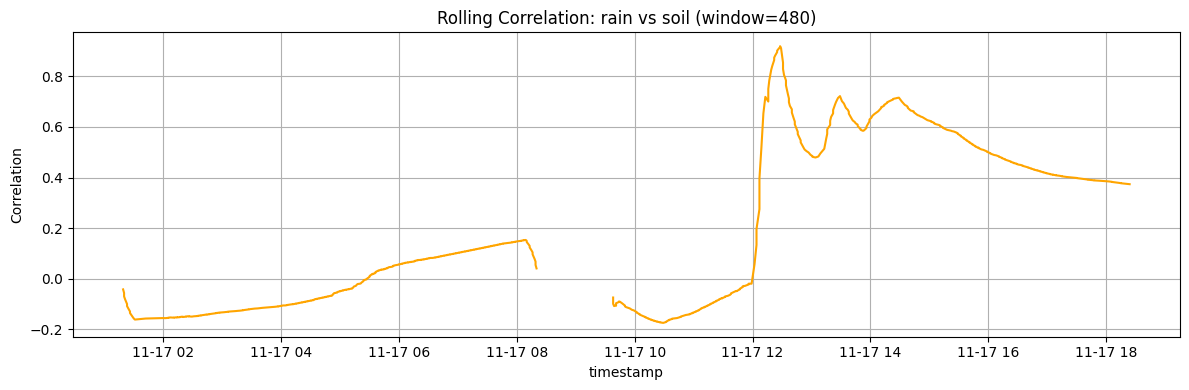

In [112]:
# ตัวอย่าง: ถ้า sampling ทุก 10 นาที → 48 จุด = 8 ชั่วโมง
df = df_val.copy()
df['timestamp'] = pd.to_datetime(df['timestamp'])
df = df.sort_values('timestamp')

rolling_corr = df['rain'].rolling(window_size*8).corr(df['soil'])

plt.figure(figsize=(12, 4))
plt.plot(df['timestamp'], rolling_corr, color='orange')
plt.title(f"Rolling Correlation: rain vs soil (window={window_size*8})")
plt.xlabel("timestamp")
plt.ylabel("Correlation")
plt.grid(True)
plt.tight_layout()
plt.show()

## histogram

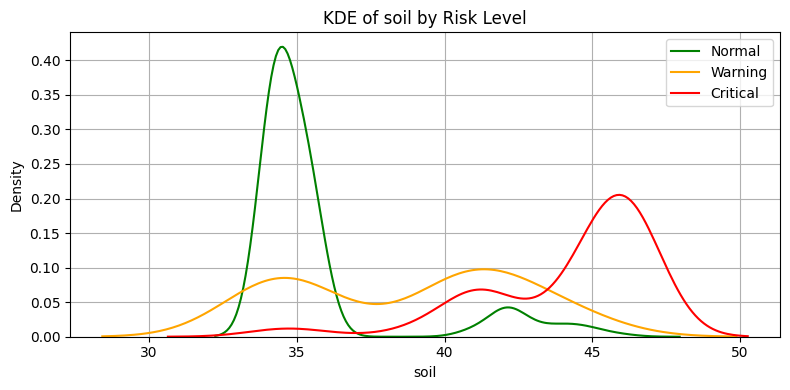

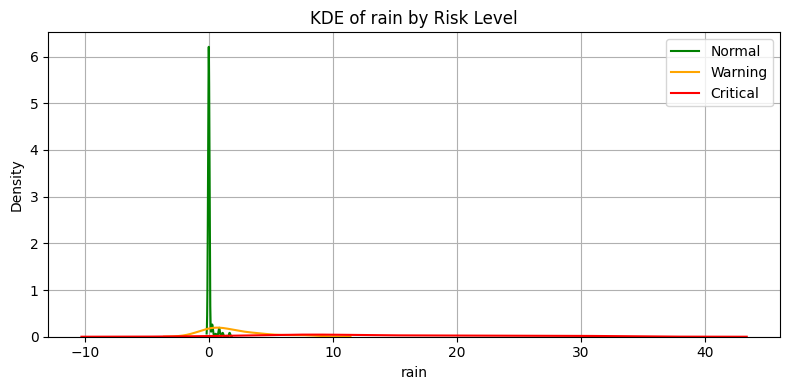

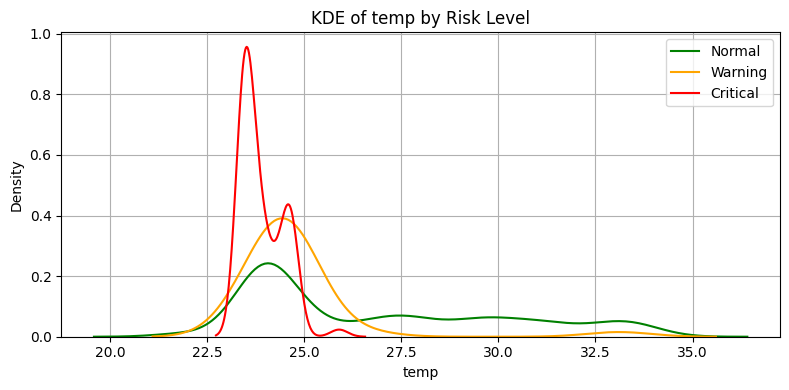

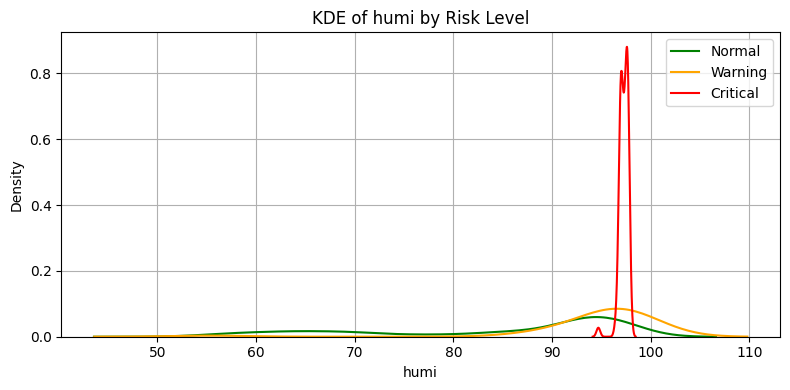

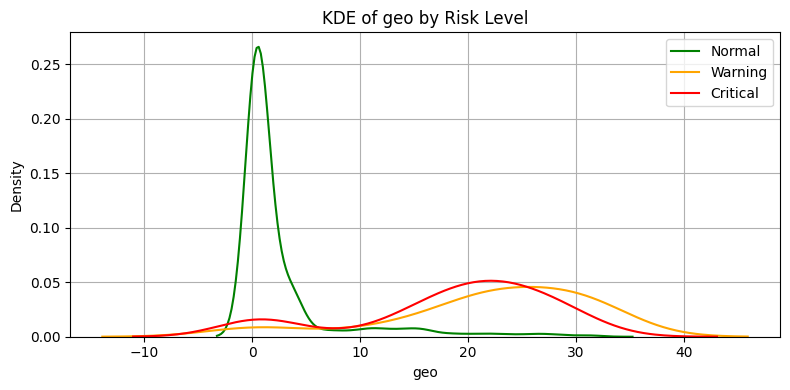

In [113]:
for col in feature_cols:
    plt.figure(figsize=(8, 4))
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Normal'][col], label='Normal', color='green')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Warning'][col], label='Warning', color='orange')
    sns.kdeplot(df_val[df_val['predicted_risk'] == 'Critical'][col], label='Critical', color='red')
    plt.title(f"KDE of {col} by Risk Level")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

## Box Plot feature by risk

C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\ahmad\AppData\Local\Temp\ipykernel_20820\564551364.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and 

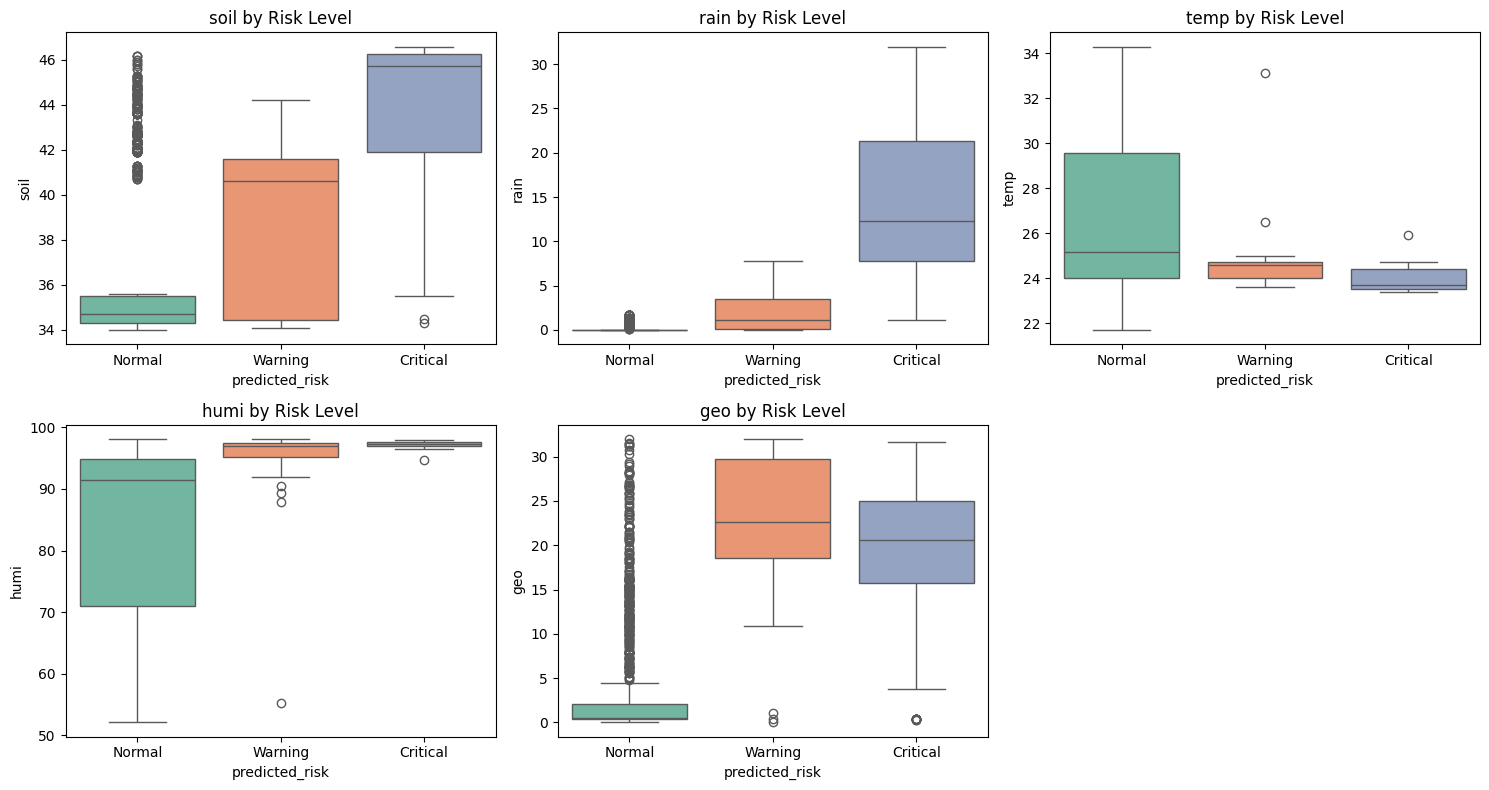

In [114]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(feature_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(
        x='predicted_risk',
        y=col,
        data=df_val,
        order=['Normal', 'Warning', 'Critical'],  # 🔧 fix order here
        palette='Set2'
    )
    plt.title(f'{col} by Risk Level')
plt.tight_layout()
plt.show()


## Time Series

In [116]:
df['timestamp'].min()

Timestamp('2025-11-16 06:10:00')

In [118]:
df['timestamp'].max()

Timestamp('2025-11-17 18:24:00')

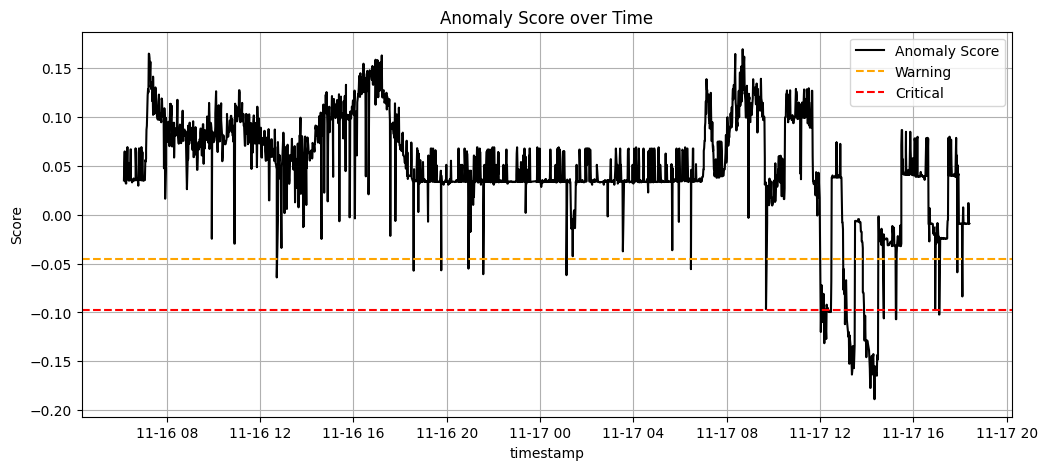

In [121]:
if 'timestamp' in df_val.columns:
    df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
    df_val_sorted = df_val.sort_values('timestamp')

    plt.figure(figsize=(12,5))
    plt.plot(df_val_sorted['timestamp'], df_val_sorted['anomaly_score'], color='black', label='Anomaly Score')
    plt.axhline(warn_thresh, color='orange', linestyle='--', label='Warning')
    plt.axhline(crit_thresh, color='red', linestyle='--', label='Critical')
    plt.title('Anomaly Score over Time')
    plt.xlabel('timestamp')
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

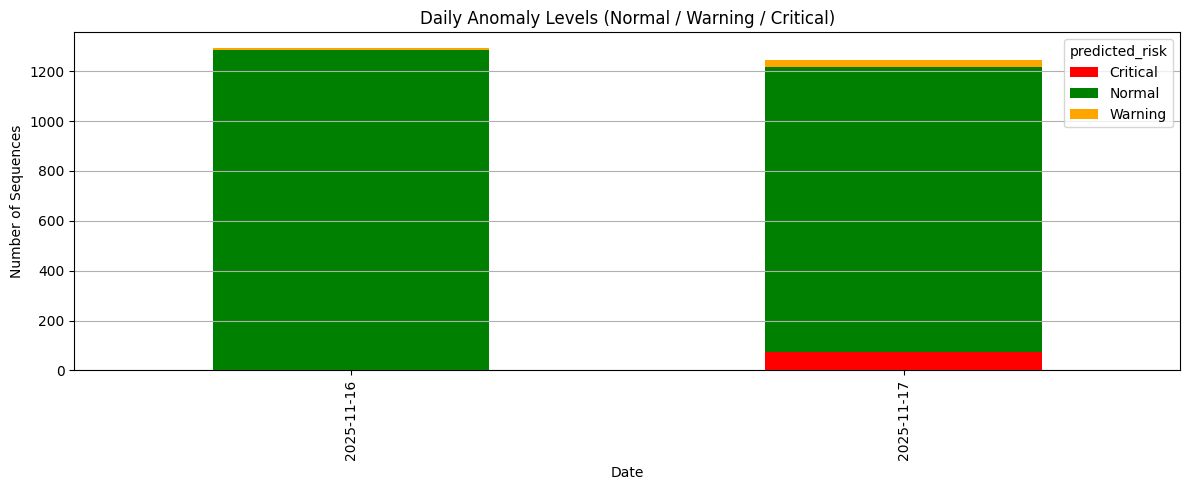

In [123]:

df_results = df_val
df_results['date'] = pd.to_datetime(df_results['timestamp']).dt.date

risk_order = ['Critical', 'Normal', 'Warning']

alerts_per_day = df_results.groupby(['date', 'predicted_risk']).size().unstack(fill_value=0)

for risk in risk_order:
    if risk not in alerts_per_day.columns:
        alerts_per_day[risk] = 0

alerts_per_day = alerts_per_day[risk_order]

colors = ['red', 'green', 'orange']

alerts_per_day.plot(kind='bar', stacked=True, figsize=(12,5), color=colors)

plt.title("Daily Anomaly Levels (Normal / Warning / Critical)")
plt.xlabel("Date")
plt.ylabel("Number of Sequences")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


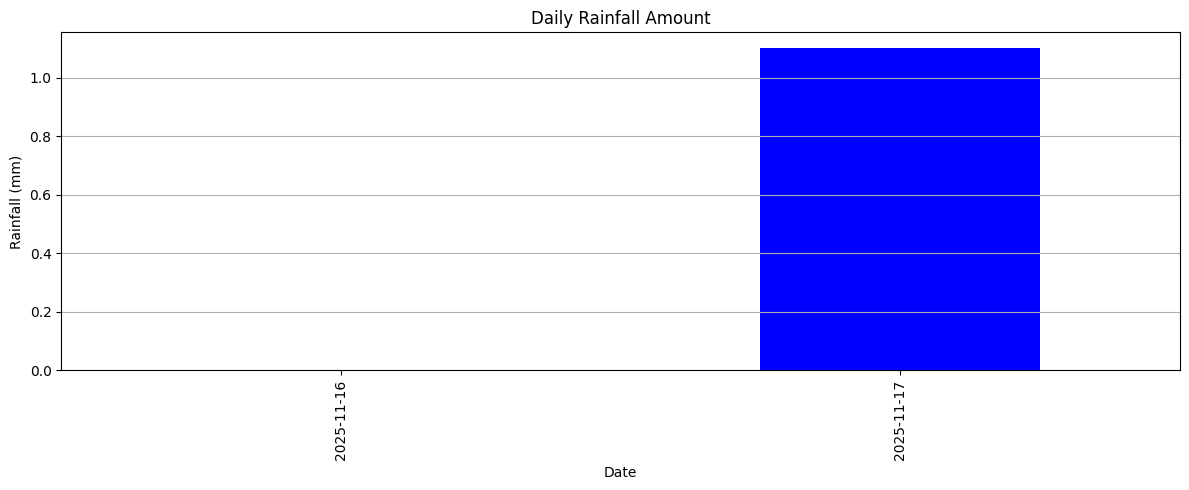

In [125]:

# สมมติ df_rain มี 'timestamp' และ 'rain_amount'

df_results['date'] = pd.to_datetime(df_results['timestamp']).dt.date

# รวมปริมาณฝนรายวัน (sum)
rain_per_day = df_results.groupby('date')['rain'].mean()

# plot กราฟแท่งปริมาณฝนรายวัน
plt.figure(figsize=(12,5))
rain_per_day.plot(kind='bar', color='blue')

plt.title("Daily Rainfall Amount")
plt.xlabel("Date")
plt.ylabel("Rainfall (mm)")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


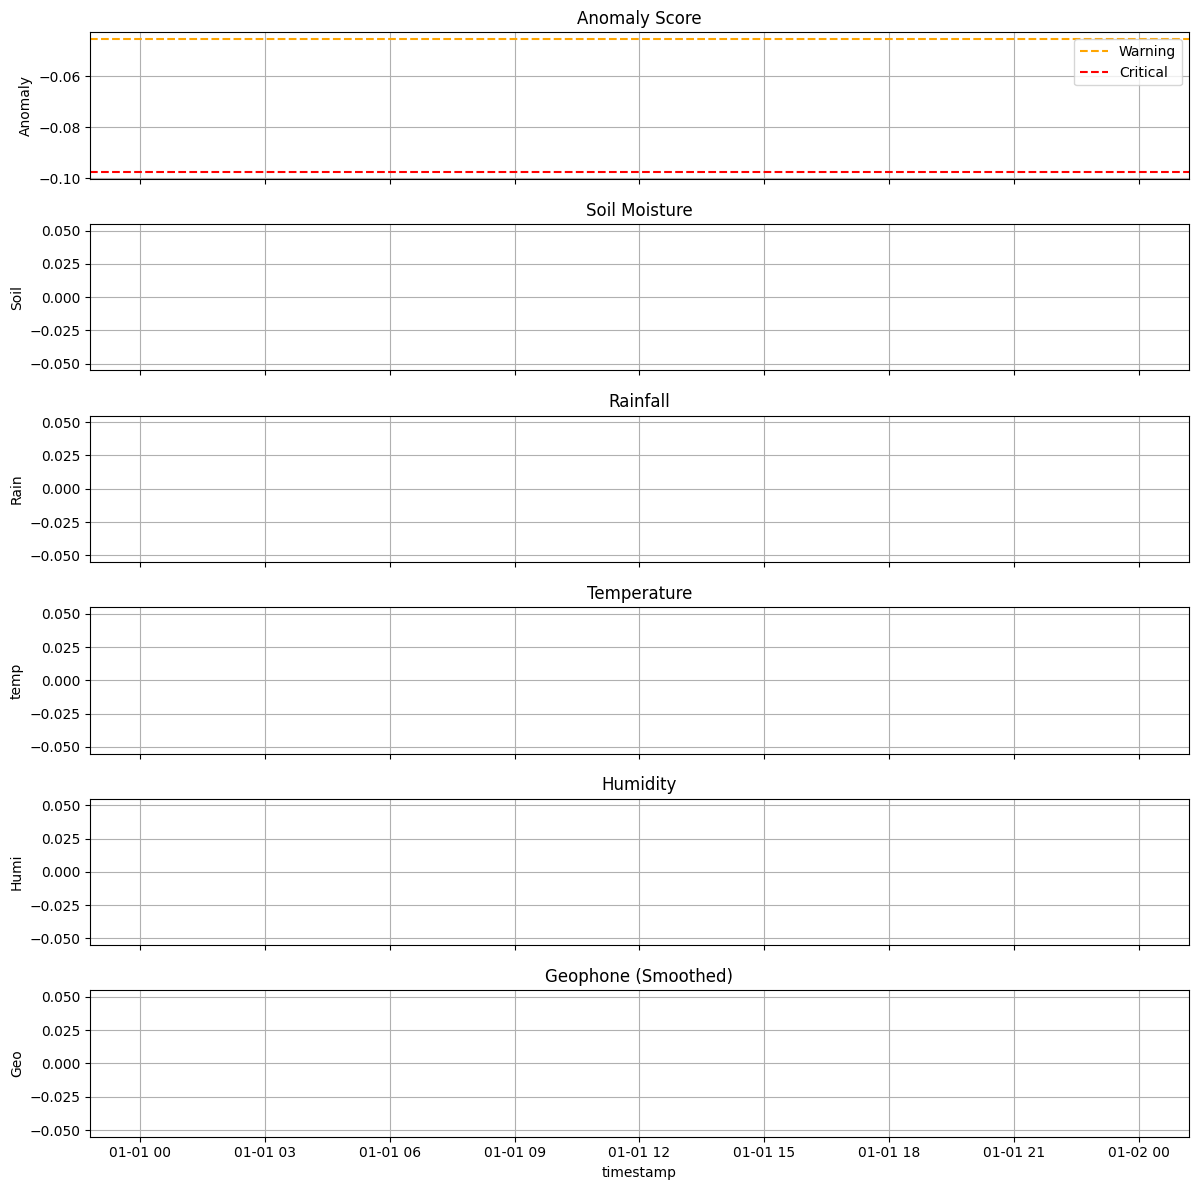

In [130]:
df_val['timestamp'] = pd.to_datetime(df_val['timestamp'])
df_dev = df_val.set_index('timestamp').sort_index()
#df_dev = df_dev[df_dev['devID'] == 101.0] 
df_range = df_dev.loc["2025-11-05":"2025-11-07"]

# สร้าง subplot 6 แถว
fig, axs = plt.subplots(6, 1, figsize=(12, 12), sharex=True)

# Plot 1: Anomaly Score
axs[0].scatter(df_range.index, df_range['anomaly_score'], color='green', s=15)
axs[0].axhline(y=warn_thresh, color='orange', linestyle='--', label='Warning')
axs[0].axhline(y=crit_thresh, color='red', linestyle='--', label='Critical')
axs[0].set_ylabel("Anomaly")
axs[0].set_title("Anomaly Score")
axs[0].legend()
axs[0].grid(True)

# Plot 2: Soil
axs[1].plot(df_range.index, df_range['soil'], color='saddlebrown')
axs[1].set_ylabel("Soil")
axs[1].set_title("Soil Moisture")
axs[1].grid(True)

# Plot 3: Rain
axs[2].plot(df_range.index, df_range['rain'], color='blue')
axs[2].set_ylabel("Rain")
axs[2].set_title("Rainfall")
axs[2].grid(True)

# Plot 4: Temp
axs[3].plot(df_range.index, df_range['temp'], color='red')
axs[3].set_ylabel("temp")
axs[3].set_title("Temperature")
axs[3].grid(True)

# Plot 5: Humi
axs[4].plot(df_range.index, df_range['humi'], color='purple')
axs[4].set_ylabel("Humi")
axs[4].set_title("Humidity")
axs[4].grid(True)

window_size = 20  # ลองปรับค่าตามความเหมาะสม เช่น 10, 50, 100
smoothed_geo = df_range['geo'].rolling(window=window_size).mean()

axs[5].plot(df_range.index, smoothed_geo, color='black')
axs[5].set_ylabel("Geo")
axs[5].set_title("Geophone (Smoothed)")
axs[5].grid(True)

plt.xlabel("timestamp")
plt.tight_layout()
plt.show()


# F1-score

In [131]:
df_val["predicted_risk"].value_counts()

predicted_risk
Normal      2428
Critical      76
Warning       31
Name: count, dtype: int64

In [132]:
df_val["label"].value_counts()

label
warning     35
critical    31
Name: count, dtype: int64

In [133]:
import pandas as pd
from sklearn.metrics import f1_score, classification_report, confusion_matrix

df_val["label"] = df_val["label"].fillna("Normal")

# 1.2 ปรับข้อความให้เป็นตัวพิมพ์เล็กทั้งหมด (Lowercase) เพื่อให้เทียบกันได้
# เช่น 'Normal' จะตรงกับ 'normal', 'Warning' ตรงกับ 'warning'
df_val["predicted_risk"] = df_val["predicted_risk"].str.lower().str.strip()
df_val["label"] = df_val["label"].str.lower().str.strip()

# ---------------------------------------------------------
# 2. คำนวณ F1 Score
# ---------------------------------------------------------

y_true = df_val["label"]          # ค่าจริง
y_pred = df_val["predicted_risk"] # ค่าที่โมเดลทำนาย

# กำหนดลำดับ Class เพื่อให้แสดงผลสวยงาม (เรียงตามความรุนแรง)
target_names = ['normal', 'warning', 'critical']

print("------- Classification Report (F1 Score) -------")
# คำสั่งนี้จะคำนวณ Precision, Recall, และ F1-score ให้ครบทุก Class
print(classification_report(y_true, y_pred, labels=target_names))

print("\n------- Confusion Matrix -------")
# ดูว่าทำนายถูก/ผิด ไปตกที่ช่องไหนบ้าง
cm = confusion_matrix(y_true, y_pred, labels=target_names)
df_cm = pd.DataFrame(cm, index=[f"Actual {c}" for c in target_names], 
                         columns=[f"Pred {c}" for c in target_names])
print(df_cm)

# ---------------------------------------------------------
# 3. ถ้าต้องการค่า F1 Score ตัวเดียว (Macro หรือ Weighted)
# ---------------------------------------------------------
f1_macro = f1_score(y_true, y_pred, average='macro')
print(f"\nMacro F1 Score: {f1_macro:.4f}")

------- Classification Report (F1 Score) -------
              precision    recall  f1-score   support

      normal       0.99      0.98      0.99      2469
     warning       0.13      0.11      0.12        35
    critical       0.39      0.97      0.56        31

    accuracy                           0.96      2535
   macro avg       0.51      0.69      0.56      2535
weighted avg       0.97      0.96      0.97      2535


------- Confusion Matrix -------
                 Pred normal  Pred warning  Pred critical
Actual normal           2412            27             30
Actual warning            15             4             16
Actual critical            1             0             30

Macro F1 Score: 0.5557
